# Project: Flight Price Prediction

### Student Names:
#### 1. Piyush Tanaji Bhujbal  
#### 2. Krushna Vikas Chavan
#### 3. Abhijeet Bhausaheb Gadakh
#### 4. Darshan Suryabhan Gadakh
#### 5. Rutik Sunil Malave




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to filter the upcoming warnings 

In [2]:
data = pd.read_excel("Datasets/Data_Train.xlsx") # reading the data from the excel data file

In [3]:
data.head(100)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
95,IndiGo,21/06/2019,Chennai,Kolkata,MAA → CCU,05:15,07:40,2h 25m,non-stop,No info,3540
96,SpiceJet,15/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
97,Jet Airways,3/06/2019,Banglore,Delhi,BLR → DEL,19:50,22:50,3h,non-stop,In-flight meal not included,6478
98,Jet Airways,18/06/2019,Mumbai,Hyderabad,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040


In [4]:
data.shape

(10683, 11)

In [5]:
data.isna().sum() # record and print all the missing values 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Extracting the required data 

In [6]:
data.dropna(inplace = True) # drop all the missing values and update the new data

In [7]:
data.isna().sum() # checking whther some missing value is left over or not

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dtypes # checking all the data types in the data frame

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_to_date_time(col):
    data[col] = pd.to_datetime(data[col]) # function that converts objects of date time formates to actual date time

In [10]:
data.columns # accessing all the columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_date_time(i)

In [12]:
data.dtypes # converted all the rrelated columns to data _time format

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 05:50:00,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-28 18:05:00,2022-05-28 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-28 16:50:00,2022-05-28 21:35:00,4h 45m,1 stop,No info,13302


In [14]:
data['journey_day'] = data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month

In [15]:
data.head() # tracing new columns added 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 05:50:00,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-28 18:05:00,2022-05-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-28 16:50:00,2022-05-28 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
data.drop('Date_of_Journey', axis = 1, inplace = True) # dropped the date_ofJourney column

In [17]:
data.head() # accessing all the columns

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-28 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-28 05:50:00,2022-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-28 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-28 18:05:00,2022-05-28 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-28 16:50:00,2022-05-28 21:35:00,4h 45m,1 stop,No info,13302,3,1


Extracting the hours and minutes from the Dep_Time and Arrival_Time columns

In [18]:
 def extract_hour(df, col): # extract hours from the given columns
    df[col +'_hour'] = df[col].dt.hour
    
    
def extract_minute(df, col):   # extract minutes from the given columns
    df[col+'_mins'] = df[col].dt.minute
    
    
def drop_columns(df, col):  # drop that column after extracting the data
    df.drop(col, axis = 1, inplace = True)
    

In [19]:
extract_hour(data, 'Dep_Time')
extract_minute(data, 'Dep_Time') # calling all the functions
drop_columns(data, 'Dep_Time')

In [20]:
extract_hour(data, 'Arrival_Time')
extract_minute(data, 'Arrival_Time') # calling all the functions
drop_columns(data, 'Arrival_Time')

In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
duration = list(data['Duration'])

In [23]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
            
        else:
            duration[i] = '0h '+ duration[i]

In [24]:
data['Duration'] = duration

In [25]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


# Data Preprocessing

Extracting the hours and minutes from the Duration column of the dataset

In [26]:
'5h 25m'.split(' ')[0][0 : -1] # accessing the hour from the given time

'5'

In [27]:
def hour(x):
    return x.split(' ')[0][0 : -1] # extracting the hour from the main thread of Duration


def minute(x):
    return x.split(' ')[1][0 : -1] # extracting the minute from the main thread of Duration

In [28]:
data['Duration_Hours'] = data['Duration'].apply(hour) # storing in new column as 'Duration_Hours'
data['Duration_Minutes'] = data['Duration'].apply(minute) # storing in new column as 'Duration_Minutes'

In [29]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
drop_columns(data, 'Duration') # dropping the duration column

In [31]:
data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_mins         int64
Arrival_Time_hour     int64
Arrival_Time_mins     int64
Duration_Hours       object
Duration_Minutes     object
dtype: object

In [32]:
# converting them to integers
data['Duration_Hours'] = data['Duration_Hours'].astype(int)
data['Duration_Minutes'] = data['Duration_Minutes'].astype(int)

In [33]:
data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_mins         int64
Arrival_Time_hour     int64
Arrival_Time_mins     int64
Duration_Hours        int32
Duration_Minutes      int32
dtype: object

In [34]:
# fething the categorical data
categorical_columns = [col for col in data.columns if data[col].dtype == 'O'] 
categorical_columns

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
# fetching the continuous data
continuous_columns = [col for col in data.columns if data[col].dtype != 'O']
continuous_columns

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_mins',
 'Arrival_Time_hour',
 'Arrival_Time_mins',
 'Duration_Hours',
 'Duration_Minutes']

# Types of Data Encoding Techniques
### Nominal data: OneHat encoding
### Ordinal data: LabelEncoding

In [36]:
categorical = data[categorical_columns]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [37]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

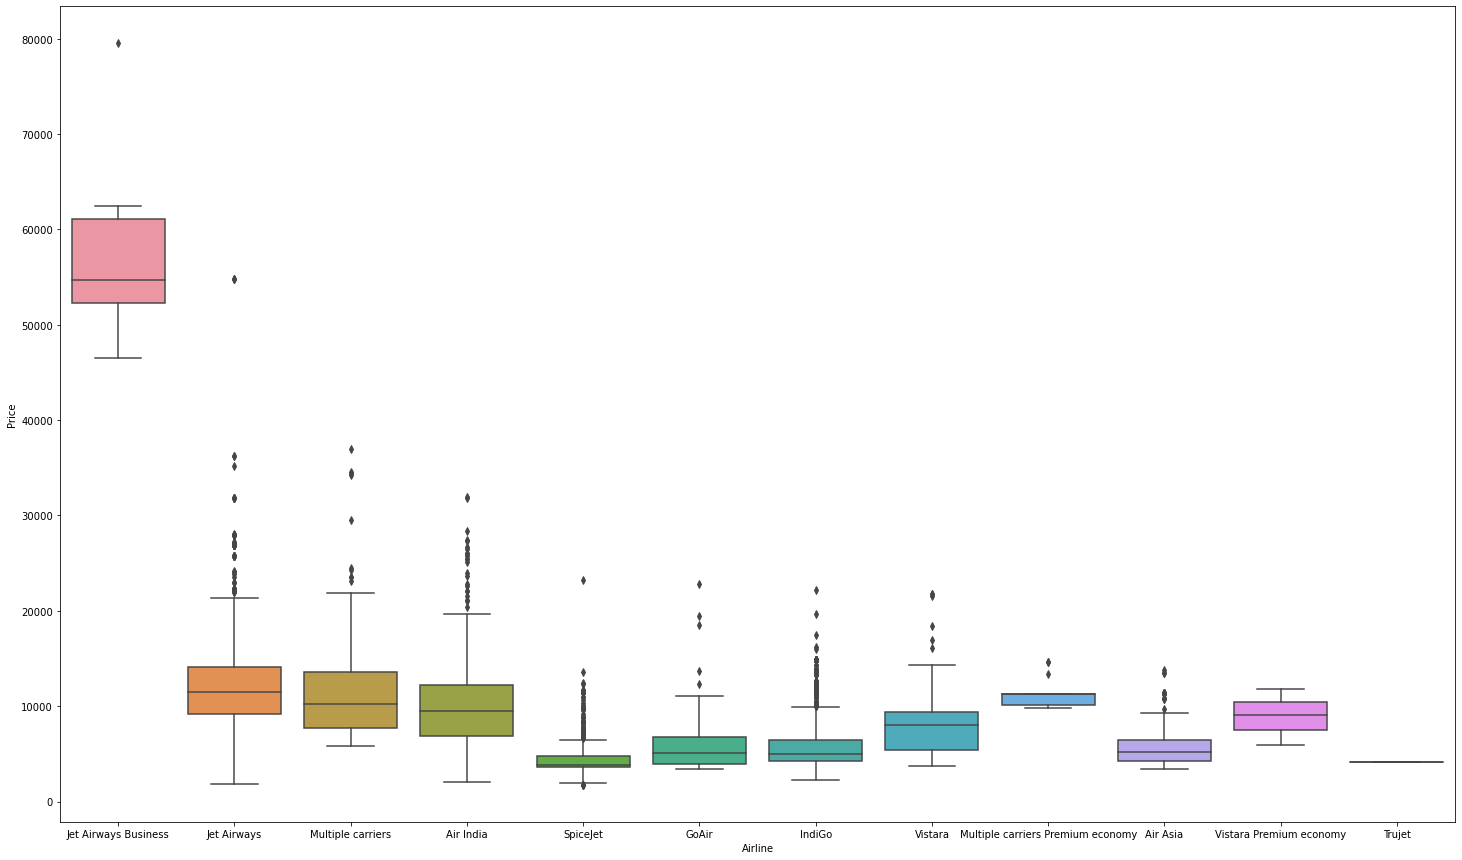

In [38]:
plt.figure(figsize = (25, 15))
sns.boxplot(x = 'Airline', y = 'Price', data = data.sort_values('Price', ascending = False))

In [39]:
# from this box plot the jet airways has the highest business and others have a similar graph of development

In [40]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

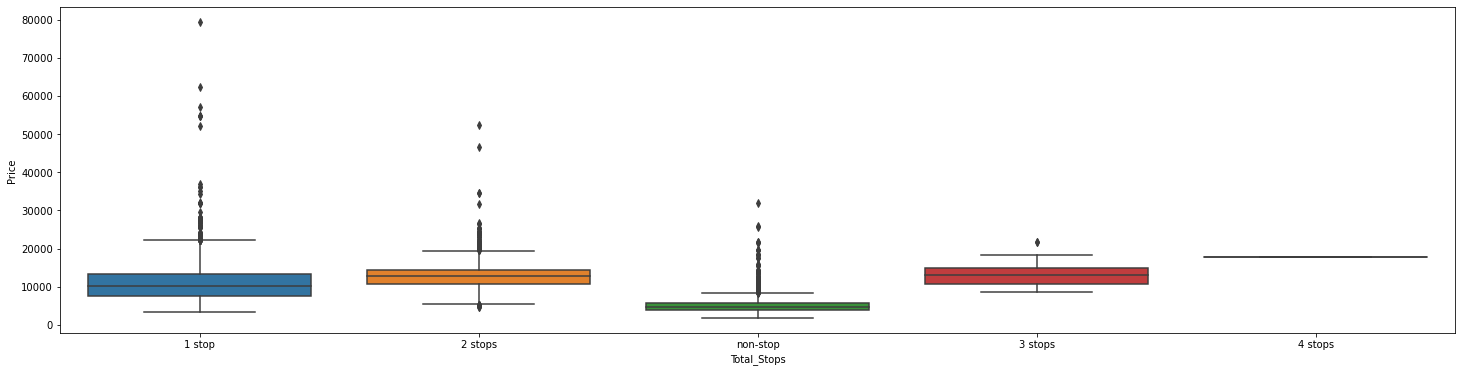

In [41]:
plt.figure(figsize = (25, 6))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = data.sort_values('Price', ascending = False))

In [42]:
Airline = pd.get_dummies(categorical['Airline'], drop_first = True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

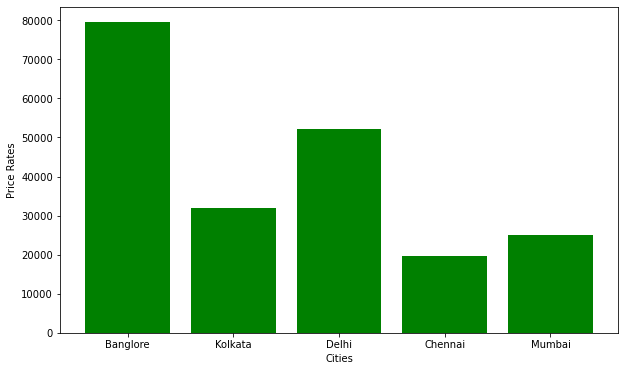

In [44]:
plt.figure(figsize = (10, 6))
x = categorical['Source']
y = data['Price']
plt.bar(x, y, color = "green")
plt.xlabel("Cities")
plt.ylabel("Price Rates")
plt.show()

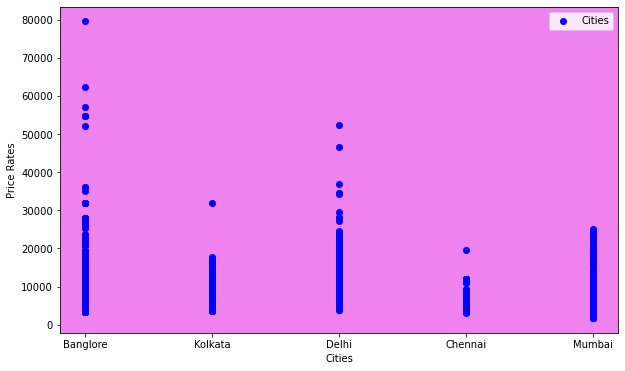

In [45]:
plt.figure(figsize = (10, 6))
ax = plt.axes()
ax.set_facecolor("violet")
cities = categorical["Source"]
prices = data["Price"]
plt.scatter(cities, prices, color = "blue", label = "Cities")
plt.xlabel("Cities")
plt.ylabel("Price Rates")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Source', ylabel='Price'>

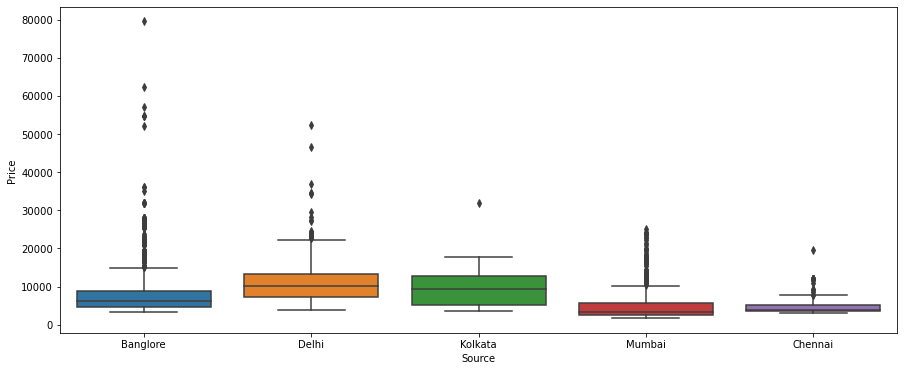

In [46]:
# plotting with respect to box plot
plt.figure(figsize = (15, 6))
plt.xlabel("Cities")
plt.ylabel("Price Rates")
sns.boxplot(x = 'Source', y = 'Price', data = data.sort_values('Price', ascending = False))

In [47]:
Source = pd.get_dummies(categorical['Source'], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [48]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

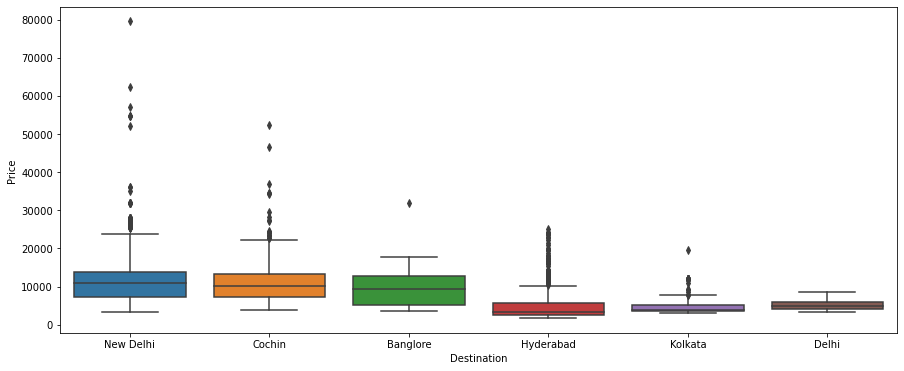

In [49]:
# plotting with respect to box plot
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'Destination', y = 'Price', data = data.sort_values('Price', ascending = False))

In [50]:
Destination = pd.get_dummies(categorical['Destination'], drop_first = True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [51]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [52]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
drop_columns(categorical, 'Route')

In [54]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [55]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [56]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace = True)

In [57]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [58]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder() # object of the class LabelEncoder

In [61]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [62]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

In [63]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [64]:
drop_columns(categorical, 'Additional_Info')

In [65]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
dict_Total_Stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [67]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict_Total_Stops)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


Concatenating all the processed data frames

In [68]:
data_list = [categorical, Airline, Source, Destination, data[continuous_columns]]
data_train = pd.concat(data_list, axis = 1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [69]:
drop_columns(data_train, 'Airline')      # }
drop_columns(data_train, 'Source')       # } dropping all the columns which are not required
drop_columns(data_train, 'Destination')  # }
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [70]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


# Handling the outliers in our data

In [71]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

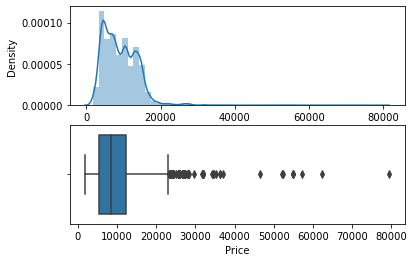

In [72]:
plot(data_train, 'Price')

In [73]:
data_train['Price'] = np.where(data_train['Price'] >= 40000, data_train['Price'].median(), data_train['Price'])

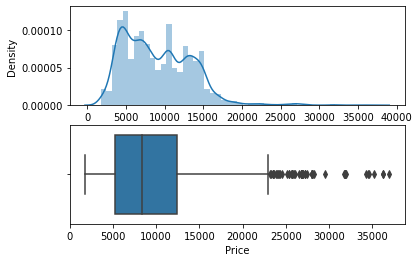

In [74]:
plot(data_train, 'Price')

In [75]:
x = data_train.drop(['Price'], axis = 1)
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [76]:
x.shape

(10682, 34)

In [77]:
y = data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

# Feature selection
A feature is that variable that has a core connection with our data and our analysis. This reduces the issue of multiple dimensions and columns that create a problem.

In [78]:
from sklearn.feature_selection import mutual_info_classif

In [79]:
mutual_info_classif(x, y)

array([2.15934793, 2.0173784 , 2.77119151, 2.26632446, 1.48476529,
       0.76638443, 0.77349187, 0.09680327, 0.63635099, 0.92563223,
       0.        , 0.57623351, 0.00608375, 0.32417443, 0.00803206,
       0.21679585, 0.        , 0.15208317, 1.51183894, 0.90069765,
       0.29443239, 1.52856396, 0.4090089 , 0.28978127, 0.16292255,
       0.36804033, 1.06828328, 0.86119471, 1.42315108, 1.17133906,
       1.8554226 , 1.54448456, 1.80853997, 1.08314139])

In [80]:
important = pd.DataFrame(mutual_info_classif(x, y), x.columns)

In [81]:
important # the important freatures for the implementation of algorithms

,0
Total_Stops,2.184799
Route_1,2.065378
Route_2,2.778759
Route_3,2.299372
Route_4,1.448037
Route_5,0.695015
Air India,0.793039
GoAir,0.085880
IndiGo,0.676535
Jet Airways,0.916616


In [82]:
important.columns = ['importance']
important.sort_values(by = 'importance', ascending = False)

,importance
Route_2,2.778759
Route_3,2.299372
Total_Stops,2.184799
Route_1,2.065378
Arrival_Time_hour,1.842510
Duration_Hours,1.792816
Arrival_Time_mins,1.574446
Cochin,1.535841
Delhi,1.533802
Route_4,1.448037


# Implementing Random Forest and other Algorithms
Used in case for regression. Follows ensemble learning approach. Learns from multiple models and at the end it will combine all the learning. This is the ensemble approach. It is just a collection of multiple decision trees. As we all know a huge number of trees in a place make a forest. So, it is called Random Forest.

### Uses of decision trees
Uses of Decision trees:
1) Classification use cases
2) Regression use cases


In [83]:
from sklearn.model_selection import train_test_split
import pickle

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [85]:
from sklearn import metrics

In [86]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model.pkl",'wb')
        pickle.dump(model,file)
    

In [87]:
from sklearn.ensemble import RandomForestRegressor # importing the regressor class

Training score : 0.9546376846758479
predictions are: 
 [ 4803.5        14307.12857143  4015.09333333 ... 13944.79233333
  5828.04        5060.95      ]


r2 score: 0.7979511964337771
Mean Absolute Error: 1178.5574444525473
Mean Squared Error: 4138933.9594543735
Root Mean Squared Error: 2034.4370128992377


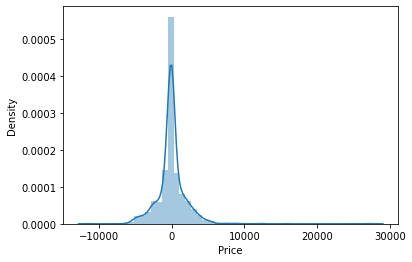

In [88]:
predict(RandomForestRegressor(), 1)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
    

Training score : 0.6244867471055235
predictions are: 
 [ 2926.66544008 12708.35694183  3746.25362059 ... 14692.52486744
  4114.65331456  8498.9784525 ]


r2 score: 0.5831162540746562
Mean Absolute Error: 2018.025876978274
Mean Squared Error: 8539789.707734767
Root Mean Squared Error: 2922.2918587531203


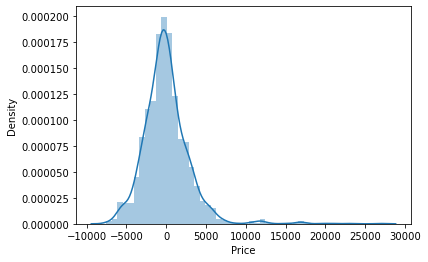

In [90]:
predict(LinearRegression(), 0)



Training score : 0.9670767161647329
predictions are: 
 [ 4823. 14714.  3807. ... 14237.  6015.  4544.]


r2 score: 0.7083520979088174
Mean Absolute Error: 1366.9288332553424
Mean Squared Error: 5974355.625289218
Root Mean Squared Error: 2444.2495014399037


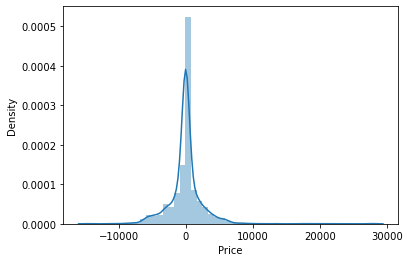

In [91]:
predict(DecisionTreeRegressor(), 0)

Training score : 0.7865101358088411
predictions are: 
 [ 5758.8 10008.8  3574.8 ... 14784.8  5526.2  6209.6]


r2 score: 0.6377449570302568
Mean Absolute Error: 1756.4728123537668
Mean Squared Error: 7420730.402096396
Root Mean Squared Error: 2724.101760598601


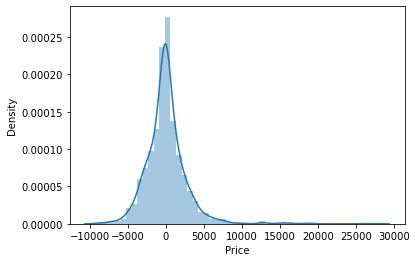

In [92]:
predict(KNeighborsRegressor(), 0)

In [93]:
from sklearn.svm import SVR

Training score : 0.048566967409566786
predictions are: 
 [7915.55910158 8470.60762153 7899.3547257  ... 8622.5234109  7897.6479116
 8162.58119588]


r2 score: 0.05127401648112562
Mean Absolute Error: 3420.4676875343657
Mean Squared Error: 19434483.758850917
Root Mean Squared Error: 4408.455938177325


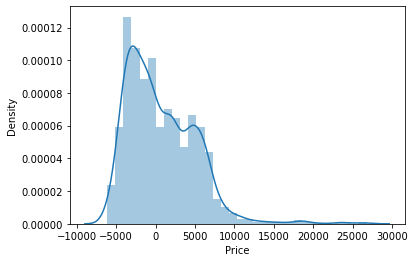

In [94]:
predict(SVR(), 0)

# Hyperparameter Tuning
## To select the best parameters for best training and testing

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [97]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [98]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [99]:
reg_rf = RandomForestRegressor()

In [100]:
rf_random=RandomizedSearchCV(estimator = reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [101]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [102]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 21}

In [103]:
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

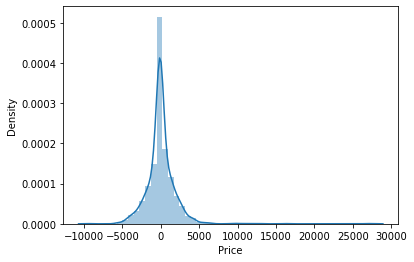

In [104]:
sns.distplot(y_test-prediction)

In [105]:
metrics.r2_score(y_test,prediction)

0.8218937746517792

In [106]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1137.6142745570337
MSE 3648474.484741861
RMSE 1910.0980301392547


In [107]:
import pickle

In [108]:
file=open('rf_random.pkl','wb')

In [109]:
# dump information to that file
pickle.dump(rf_random,file)



model=open('rf_random.pkl','rb')
forest=pickle.load(model)

y_prediction=forest.predict(X_test)

y_prediction

metrics.r2_score(y_test,y_prediction)

0.8218937746517792